## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Data Generation

In [2]:
# Initialize Faker
fake = Faker()

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of records
num_records = 5000

In [4]:
# Generate the data
data = {
    'CustomerID': [fake.uuid4() for _ in range(num_records)],
    'Age': np.random.randint(18, 70, size=num_records),
    'Gender': np.random.choice(['Male', 'Female'], size=num_records),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=num_records),
    'MonthlyCharges': np.round(np.random.uniform(20.0, 120.0, size=num_records), 2),
    'TotalCharges': lambda x: x['MonthlyCharges'] * np.random.randint(1, 36),
    'TechSupport': np.random.choice(['Yes', 'No'], size=num_records),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=num_records),
    'Tenure': np.random.randint(1, 36, size=num_records),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=num_records),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=num_records),
    'Churn': np.random.choice(['Yes', 'No'], size=num_records, p=[0.2, 0.8])  # 20% churn rate
}

# Create a DataFrame
df = pd.DataFrame(data)


In [5]:
# Calculate TotalCharges (MonthlyCharges * Tenure)
df['TotalCharges'] = (df['MonthlyCharges'] * df['Tenure']).round(2)

# Create derived features
#df['AverageMonthlyCharges'] = (df['TotalCharges'] / df['Tenure']).round(2)
#df['CustomerLifetimeValue'] = (df['TotalCharges'] * 1.2).round(2)

# Introduce some missing values and outliers
#for col in ['TotalCharges', 'MonthlyCharges']:
#    df.loc[df.sample(frac=0.01).index, col] = np.nan

#df.loc[df.sample(frac=0.01).index, 'MonthlyCharges'] *= 3  # Outliers

# Save to a CSV file for later use
df.to_csv('synthetic_customer_data.csv', index=False)

#print("Dataset generated successfully!")

In [6]:
df = pd.read_csv("synthetic_customer_data.csv")

## Exploratory Data Analysis

In [7]:
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,a1af5737-e8ac-4c67-b076-3633a234c477,56,Male,One year,107.19,750.33,Yes,No,7,Yes,Credit card (automatic),No
1,fa8181f2-6c21-4b9d-8a0f-26a5c4176990,69,Female,Month-to-month,88.74,2129.76,No,DSL,24,Yes,Mailed check,No
2,3d22d62d-1c88-4d1a-a096-a2917ea430d4,46,Female,Month-to-month,31.16,997.12,Yes,Fiber optic,32,No,Mailed check,No
3,93bf46fd-fa0d-43a2-825b-953c9fa46118,32,Male,Two year,34.77,904.02,No,Fiber optic,26,No,Bank transfer (automatic),No
4,f5652f23-b8f0-4ac9-8316-4adbdc339fad,60,Male,One year,62.81,1444.63,Yes,DSL,23,Yes,Credit card (automatic),Yes


In [8]:
df.tail()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
4995,818096ba-3d7e-4815-aa91-7730719babf3,24,Male,One year,29.77,89.31,No,No,3,Yes,Electronic check,No
4996,45e5dccc-db1c-4050-9dfb-fdf0347dcd06,66,Female,Two year,72.10,937.30,No,Fiber optic,13,Yes,Bank transfer (automatic),No
4997,15826a1b-a141-434a-8401-8719fa01c0a6,26,Female,One year,92.04,552.24,Yes,DSL,6,No,Electronic check,No
4998,ab62c9a8-7c98-436c-9696-9d39489e8eba,53,Female,Two year,90.19,1893.99,Yes,Fiber optic,21,No,Credit card (automatic),Yes
4999,3ce4ba1b-f056-4dd0-822e-eadb217a6706,36,Female,Two year,65.09,1236.71,Yes,No,19,No,Electronic check,No


In [9]:
df.dtypes

CustomerID           object
Age                   int64
Gender               object
ContractType         object
MonthlyCharges      float64
TotalCharges        float64
TechSupport          object
InternetService      object
Tenure                int64
PaperlessBilling     object
PaymentMethod        object
Churn                object
dtype: object

In [10]:
df.isnull().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalCharges        0
TechSupport         0
InternetService     0
Tenure              0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [11]:
categorical_features = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_features = ["Tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [12]:
df.corr(numeric_only= True)

,Age,MonthlyCharges,TotalCharges,Tenure
Age,1.000000,0.014612,0.014909,0.013538
MonthlyCharges,0.014612,1.000000,0.563725,0.001957
TotalCharges,0.014909,0.563725,1.000000,0.766243
Tenure,0.013538,0.001957,0.766243,1.000000


In [13]:
df[numerical_features].describe()

,Tenure,MonthlyCharges,TotalCharges
count,5000.000000,5000.000000,5000.000000
mean,17.957800,70.080128,1259.046928
std,10.004961,28.707256,920.163846
min,1.000000,20.010000,22.410000
25%,9.000000,45.627500,518.687500
50%,18.000000,70.310000,1040.870000
75%,26.250000,94.575000,1831.600000
max,35.000000,119.980000,4190.200000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

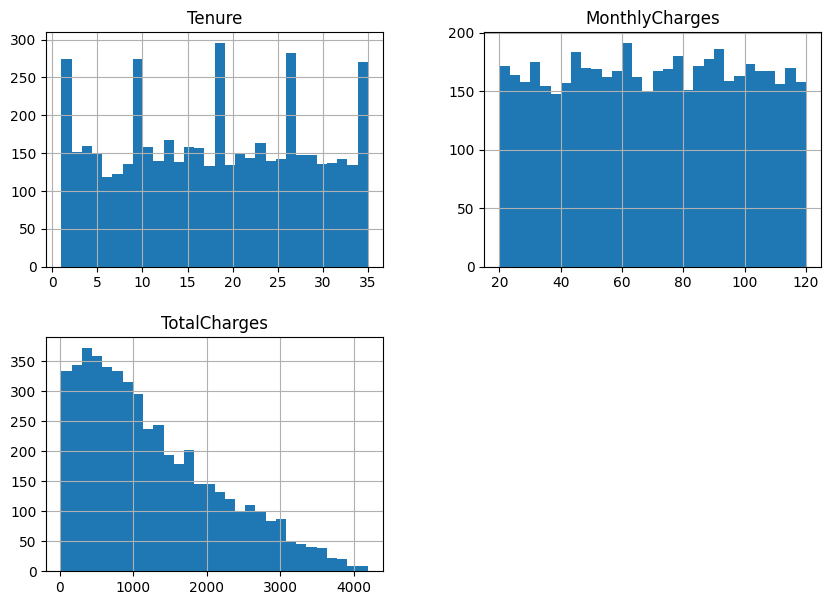

In [14]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<Axes: title={'center': 'Tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

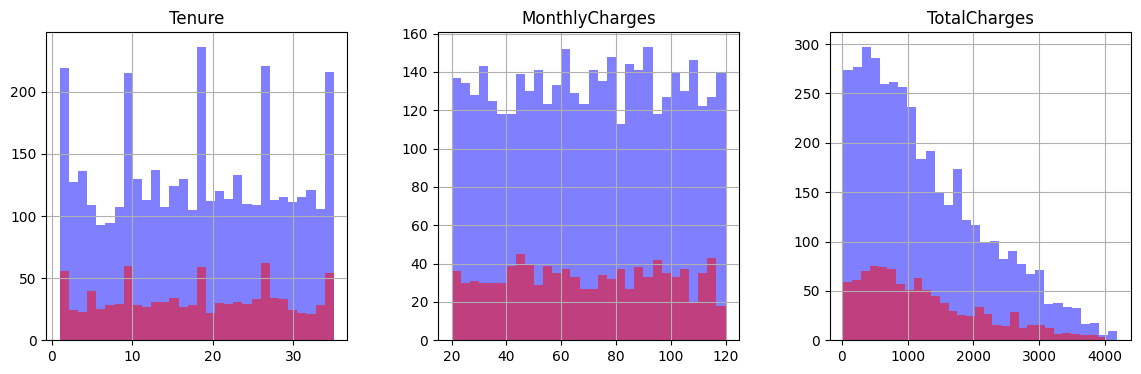

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

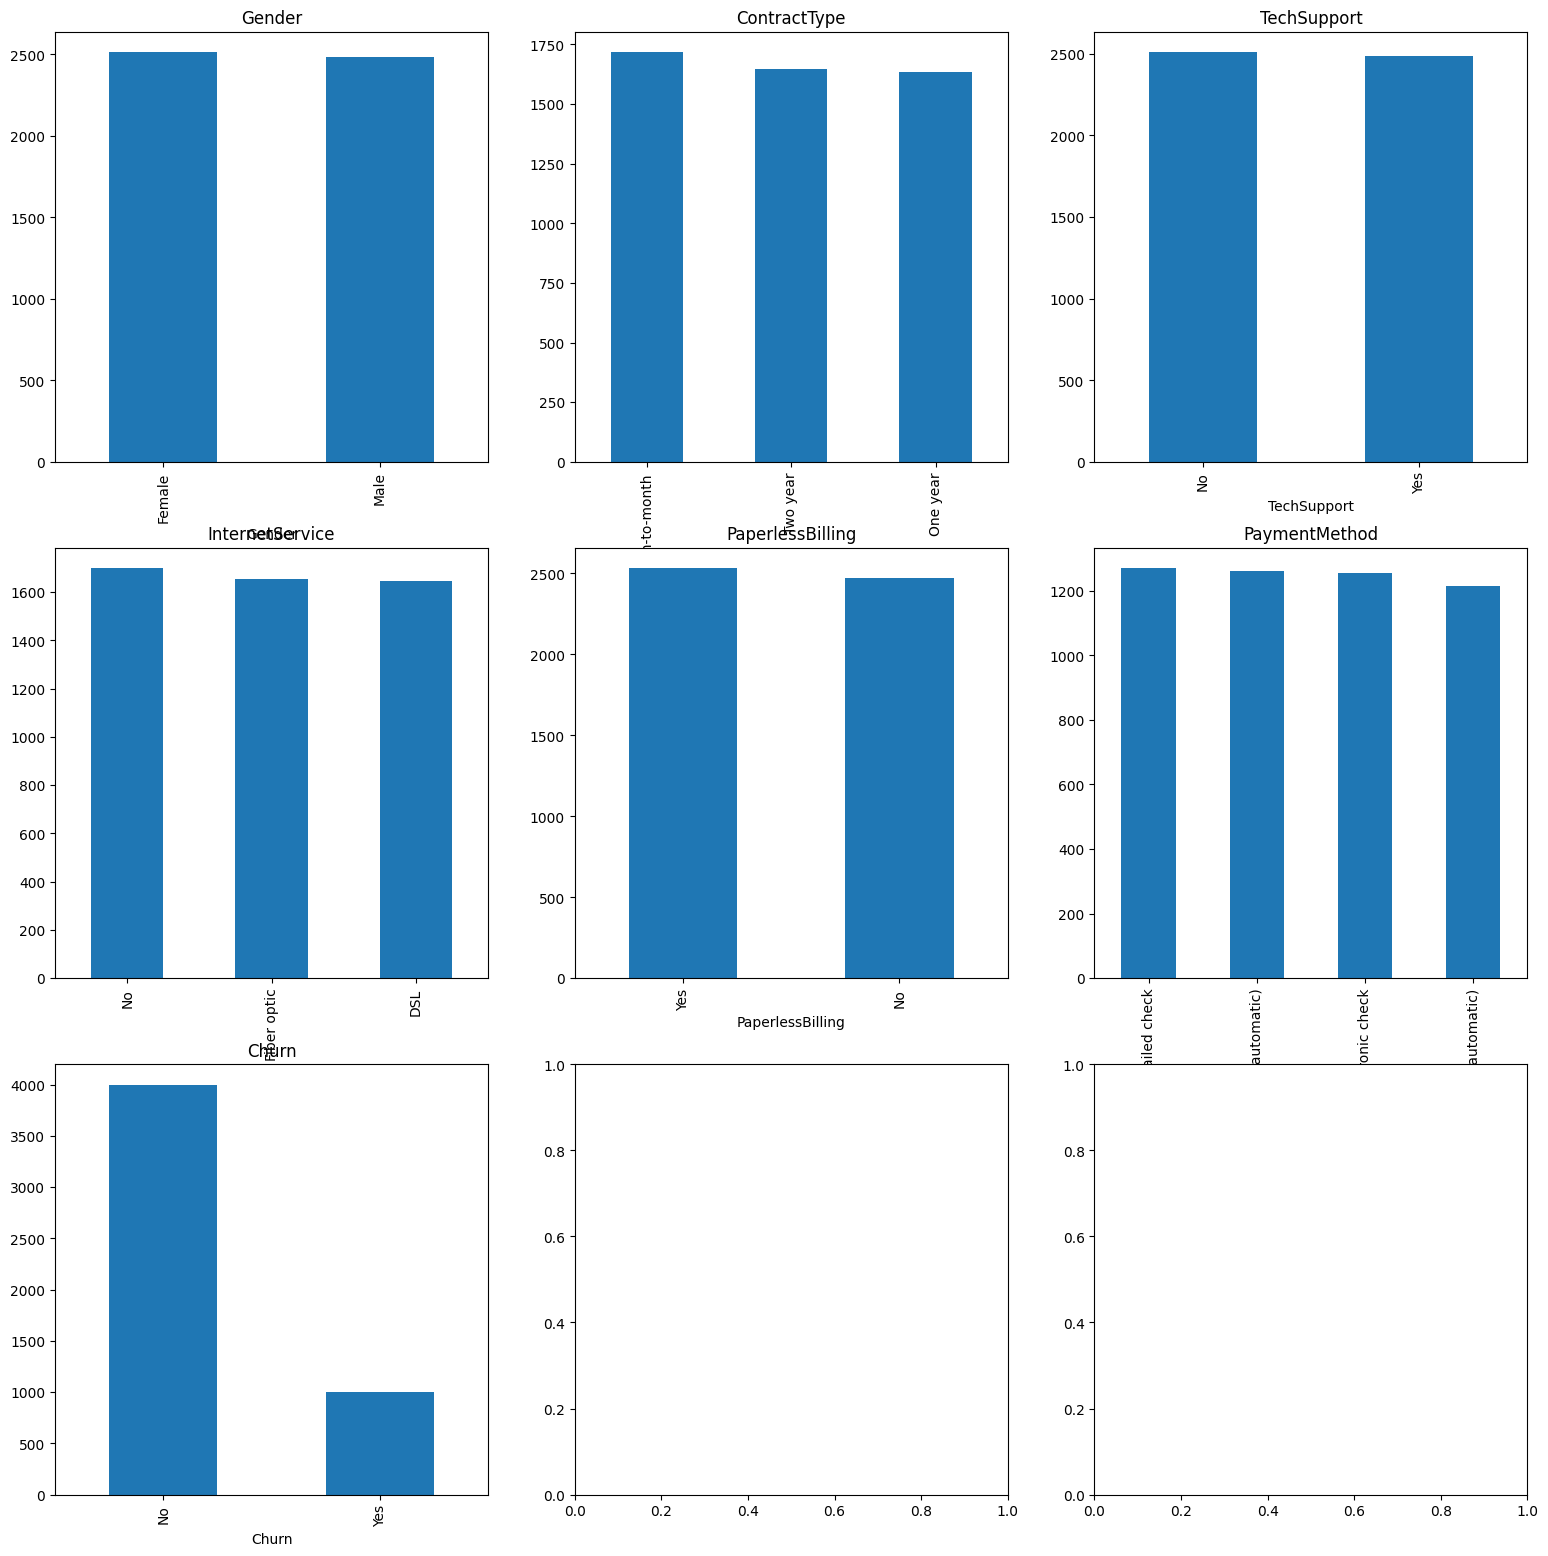

In [16]:
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

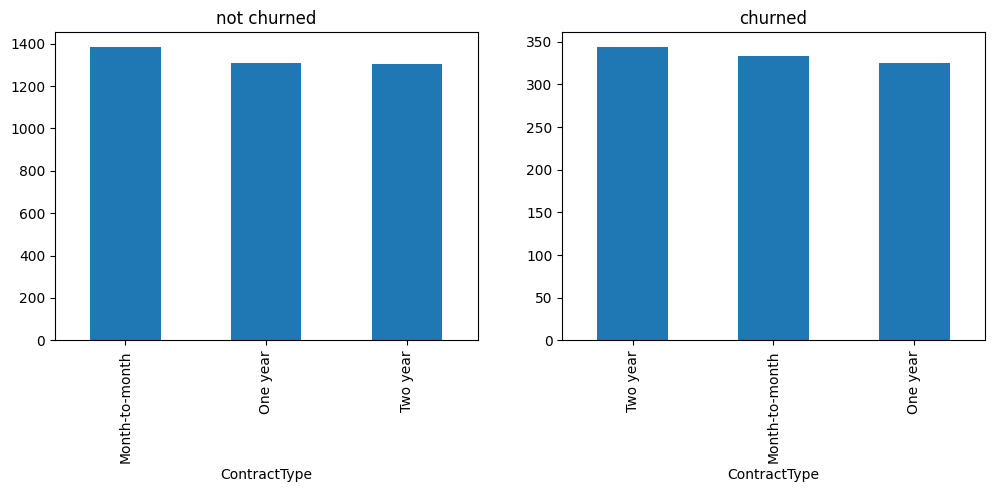

In [17]:
feature = 'ContractType'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

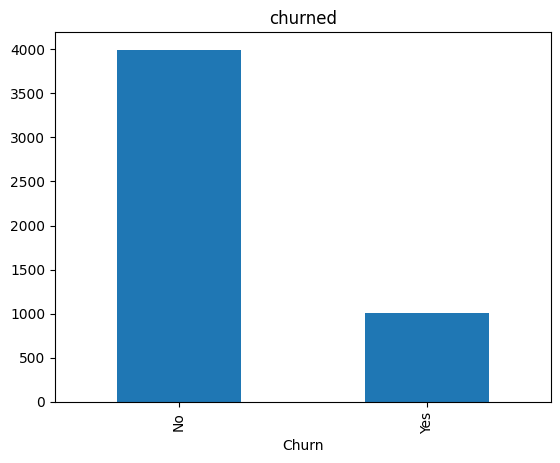

In [18]:
df[target].value_counts().plot(kind='bar').set_title('churned')

In [19]:
x = ['Tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in Tenure
No outliers in MonthlyCharges


## Cleaning and Transforming Data

In [20]:
df.drop(['CustomerID'],axis = 1,inplace = True)

In [21]:
df.head()

,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,56,Male,One year,107.19,750.33,Yes,No,7,Yes,Credit card (automatic),No
1,69,Female,Month-to-month,88.74,2129.76,No,DSL,24,Yes,Mailed check,No
2,46,Female,Month-to-month,31.16,997.12,Yes,Fiber optic,32,No,Mailed check,No
3,32,Male,Two year,34.77,904.02,No,Fiber optic,26,No,Bank transfer (automatic),No
4,60,Male,One year,62.81,1444.63,Yes,DSL,23,Yes,Credit card (automatic),Yes


## On Hot Encoding

In [22]:
df1=pd.get_dummies(data=df,columns=['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [23]:
df1.head()

,Age,MonthlyCharges,TotalCharges,Tenure,Gender_Male,ContractType_One year,ContractType_Two year,TechSupport_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,56,107.19,750.33,7,True,True,False,True,False,True,True,True,False,False,False
1,69,88.74,2129.76,24,False,False,False,False,False,False,True,False,False,True,False
2,46,31.16,997.12,32,False,False,False,True,True,False,False,False,False,True,False
3,32,34.77,904.02,26,True,False,True,False,True,False,False,False,False,False,False
4,60,62.81,1444.63,23,True,True,False,True,False,False,True,True,False,False,True


In [24]:
df1.columns

Index(['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure', 'Gender_Male',
       'ContractType_One year', 'ContractType_Two year', 'TechSupport_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

## Rearranging Columns

In [25]:
df1.shape

(5000, 15)

In [26]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [29]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [31]:
Y_pred  = logmodel.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7853333333333333
Confusion Matrix:
 [[1178    0]
 [ 322    0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.79      1.00      0.88      1178
        True       0.00      0.00      0.00       322

    accuracy                           0.79      1500
   macro avg       0.39      0.50      0.44      1500
weighted avg       0.62      0.79      0.69      1500



D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [34]:
print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.7813333333333333
Random Forest Confusion Matrix:
 [[1170    8]
 [ 320    2]]
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.99      0.88      1178
        True       0.20      0.01      0.01       322

    accuracy                           0.78      1500
   macro avg       0.49      0.50      0.44      1500
weighted avg       0.66      0.78      0.69      1500



In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(Y_test, y_pred_best_rf))
print("Tuned Random Forest Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_best_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(Y_test, y_pred_best_rf))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


D:\churn prediction\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.7853333333333333
Tuned Random Forest Confusion Matrix:
 [[1178    0]
 [ 322    0]]
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.79      1.00      0.88      1178
        True       0.00      0.00      0.00       322

    accuracy                           0.79      1500
   macro avg       0.39      0.50      0.44      1500
weighted avg       0.62      0.79      0.69      1500



D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\churn prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
import pickle

with open('churn_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [37]:
predLR

NameError: name 'predLR' is not defined

In [ ]:
Y_test

In [ ]:
print(classification_report(Y_test, predLR))

In [ ]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
logmodel.score(X_train, Y_train)

In [ ]:
accuracy_score(Y_test, predLR)

## Prediction using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

In [ ]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
dtc.score(X_train,Y_train)

In [ ]:
accuracy_score(Y_test, y_pred_dtc)